In [1]:
## imports
import sys
import os
import numpy as np
import xarray as xr
import cmocean
import matplotlib
import matplotlib.pyplot as plt
import xesmf as xe
import matplotlib.colors as colors
import cartopy
import cartopy.crs as ccrs
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
from matplotlib import gridspec
import cartopy.mpl.ticker as cticker
import scipy
import scipy.stats
from defs import mmm

In [2]:
folder = 'Data_processed/' #Data folder
modellist =  ['GISS2.1G', 'EC-Earth3-LR', 'CCSM4-UoT', 'CCSM4-Utr','CCSM4', 'CESM1.2', 'CESM2', 'IPSL-CM5A','IPSL-CM5A2','IPSL-CM6A','MIROC4m','COSMOS', 'HadCM3', 'NorESM1-F','HadGEM3']

In [3]:
#Open OHT
dsE280goht = xr.open_dataset(folder+'MMM_ensemble/E280/GOHT_100yr.nc')
dsEoi400goht = xr.open_dataset(folder+'MMM_ensemble/Eoi400/GOHT_100yr.nc')

mmmE280g = mmm(dsE280goht.OHT)
mmmEoi400g = mmm(dsEoi400goht.OHT)
std_g = (dsEoi400goht.OHT-dsE280goht.OHT).std(dim='model')

def meanoht(ds, latmax = -35, latmin = -65):
    mean = ds.OHT.where(ds.lat<=latmax).where(ds.lat>=latmin).mean(dim='lat')
    return mean

change = meanoht(dsEoi400goht)-meanoht(dsE280goht)
print('MMM OHT anomaly between 35 and 65 degS is %.3f PW (%.0f %%)' %(change.mean(dim='model'), change.mean(dim='model')/meanoht(dsE280goht).mean(dim='model')*100))

MMM OHT anomaly between 35 and 65 degS is 0.040 PW (-19 %)


In [4]:
#Open FWT
dsE280gfw = xr.open_dataset(folder+'MMM_ensemble/E280/GFWT_100yr.nc')
dsEoi400gfw = xr.open_dataset(folder+'MMM_ensemble/Eoi400/GFWT_100yr.nc')

fwmmmE280g = mmm(dsE280gfw.Ftot)
fwmmmEoi400g = mmm(dsEoi400gfw.Ftot)
fwstd_g = (dsEoi400gfw.Ftot-dsE280gfw.Ftot).std(dim='model')

def meanfw(ds, latmax = -35, latmin = -65):
    mean = ds.Ftot.where(ds.lat<=latmax).where(ds.lat>=latmin).mean(dim='lat')
    return mean

fwchange = meanfw(dsEoi400gfw)-meanfw(dsE280gfw)
print('MMM FWT anomaly between 35 and 65 degS is %.2f Sv (%.0f %%)' %(fwchange.mean(dim='model'), fwchange.mean(dim='model')/meanfw(dsE280gfw).mean(dim='model')*100))

MMM FWT anomaly between 35 and 65 degS is 0.19 Sv (31 %)


In [5]:
#Open MOC
dsE280moc = xr.open_dataset(folder+'MMM_ensemble/E280/MOC_100yr.nc')
dsEoi400moc = xr.open_dataset(folder+'MMM_ensemble/Eoi400/MOC_100yr.nc')

msf = dsEoi400moc.deepmoc-dsE280moc.deepmoc

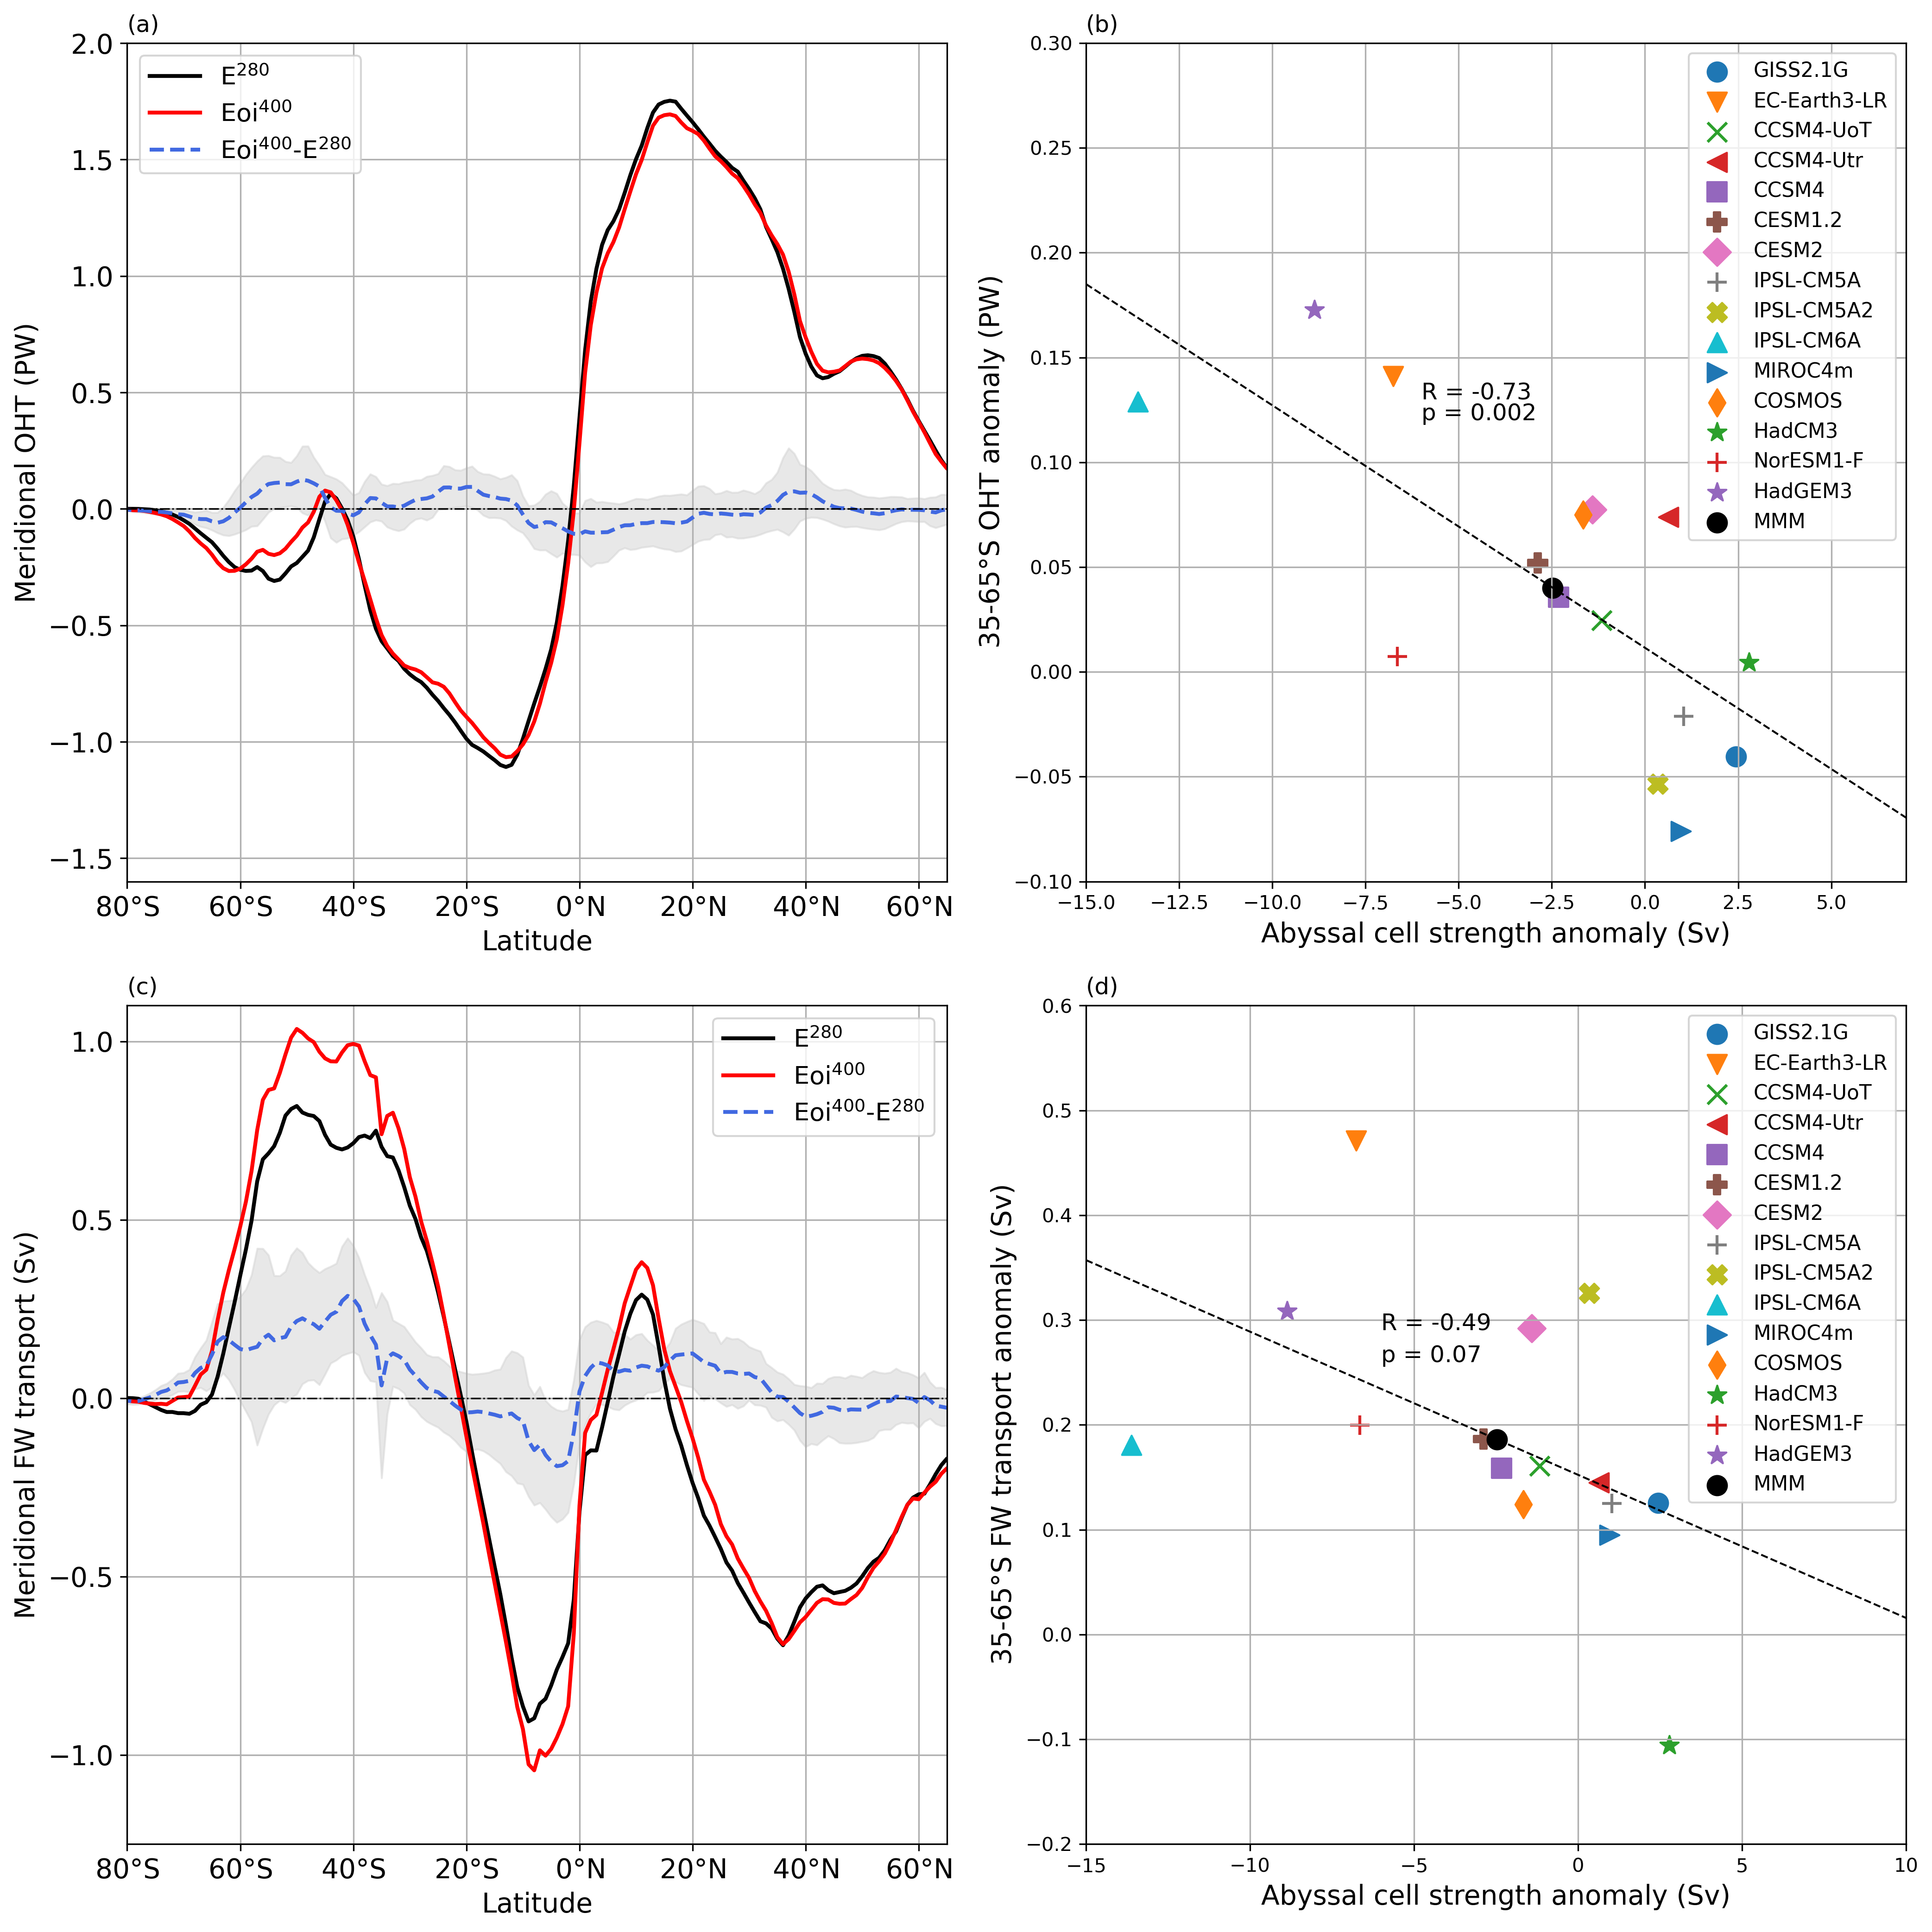

In [6]:
x_pos = np.array([-80,-60,-40,-20,0,20,40,60])
xtext = ('80$\degree$S','60$\degree$S','40$\degree$S','20$\degree$S', '0$\degree$N', '20$\degree$N', '40$\degree$N', '60$\degree$N')

lats = np.arange(-89, 90)
fig = plt.figure(figsize=(14,14), dpi=300)

ax = fig.add_subplot(221)

ax.plot(lats, mmmE280g, color='black',linewidth = 2, label='E$^{280}$')
ax.plot(lats, mmmEoi400g, color='red',linewidth = 2, label='Eoi$^{400}$')
ax.plot(lats, (mmmEoi400g-mmmE280g), color='royalblue', linewidth =2, linestyle='--', label='Eoi$^{400}$-E$^{280}$')
#ax.plot(lats[55:], (mmmEoi400g-mmmE280g)[55:], color='royalblue', linewidth =2, linestyle='--')
#ax.plot(lats[24:55], (mmmEoi400g-mmmE280g)[24:55], color='mediumorchid', linewidth =2, linestyle='--')
ax.fill_between(lats, (mmmEoi400g-mmmE280g)-std_g, (mmmEoi400g-mmmE280g)+std_g, color='lightgrey', alpha=0.5)

ax.legend(fontsize=13)
ax.plot([-80, 80],[0,0], color='black',linewidth=0.8, linestyle='-.')
ax.set_xlim([-80, 65])
ax.set_ylim([-1.6, 2])
ax.set_xticks(x_pos)
ax.set_xticklabels(xtext,fontsize=14)
ax.set_xlabel('Latitude', fontsize=14)
ax.grid(True)
    #plt.setp(ax[j].get_xticklabels(), fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=14)
ax.set_title(r'(a)', loc='left')
ax.set_ylabel('Meridional OHT (PW)', fontsize=14)

ax = fig.add_subplot(222)
x = np.arange(-200,100,0.1)

markers = ["o","v","x","<","s","P","D","+","X","^",">","d","*","+","*"]

#Perform linear regression between AMOC anomaly and total/overturning OHT anomaly
p = scipy.stats.linregress(msf, change)

for j in range(0,len(modellist)):
    scatter = ax.scatter(msf[j], change[j], s=100, c = 'C'+str(j), label=modellist[j], marker=markers[j])
scatter = ax.scatter(np.mean(msf), np.mean(change), s=100, c = 'k', label='MMM', marker='o')

ax.plot(x, x*p[0]+p[1], color='black',linewidth =1, linestyle ='--')    
ax.text(-6,0.13,'R = %.2f' %(p[2]), fontsize=12)
ax.text(-6,0.12, 'p = %.3f' %(p[3]), fontsize=12)

ax.set_ylim([-0.1, 0.3])
ax.set_xlabel('Abyssal cell strength anomaly (Sv)', fontsize=14)
ax.set_xlim([-15, 7])
ax.set_title(r'(b)', loc='left')
ax.legend(loc='upper right', fontsize=10.5)
ax.grid()

ax.set_ylabel(r'35-65$\degree$S OHT anomaly (PW)', fontsize=14)

ax = fig.add_subplot(223)

ax.plot(lats, fwmmmE280g, color='black',linewidth = 2, label='E$^{280}$')
ax.plot(lats, fwmmmEoi400g, color='red',linewidth = 2, label='Eoi$^{400}$')
ax.plot(lats, (fwmmmEoi400g-fwmmmE280g), color='royalblue', linewidth =2, linestyle='--', label='Eoi$^{400}$-E$^{280}$')
#ax.plot(lats[55:], (fwmmmEoi400g-fwmmmE280g)[55:], color='royalblue', linewidth =2, linestyle='--')
#ax.plot(lats[24:56], (fwmmmEoi400g-fwmmmE280g)[24:56], color='mediumorchid', linewidth =2, linestyle='--')
ax.fill_between(lats, (fwmmmEoi400g-fwmmmE280g)-fwstd_g, (fwmmmEoi400g-fwmmmE280g)+fwstd_g, color='lightgrey', alpha=0.5)
ax.set_title(r'(c)', loc='left')
ax.legend(fontsize=13)
ax.plot([-80, 80],[0,0], color='black',linewidth=0.8, linestyle='-.')
ax.set_xlim([-80, 65])
ax.set_ylim([-1.25, 1.1])
ax.set_xticks(x_pos)
ax.set_xticklabels(xtext,fontsize=14)
ax.set_xlabel('Latitude', fontsize=14)
ax.grid(True)
    #plt.setp(ax[j].get_xticklabels(), fontsize=14)
plt.setp(ax.get_yticklabels(), fontsize=14)

    
ax.set_ylabel('Meridional FW transport (Sv)', fontsize=14)


ax = fig.add_subplot(224)
x = np.arange(-200,100,0.1)

#Perform linear regression between AMOC anomaly and total/overturning OHT anomaly
p = scipy.stats.linregress(msf, fwchange)

for j in range(0,len(modellist)):
    scatter = ax.scatter(msf[j], fwchange[j], s=100, c = 'C'+str(j), label=modellist[j], marker=markers[j])
scatter = ax.scatter(np.mean(msf), np.mean(fwchange), s=100, c = 'k', label='MMM', marker='o')

ax.plot(x, x*p[0]+p[1], color='black',linewidth =1, linestyle ='--')    
ax.text(-6,0.29,'R = %.2f' %(p[2]), fontsize=12)
ax.text(-6,0.26, 'p = %.2f' %(p[3]), fontsize=12)

ax.set_ylim([-0.2, 0.6])
ax.set_xlabel('Abyssal cell strength anomaly (Sv)', fontsize=14)
ax.set_xlim([-15, 10])
ax.set_title(r'(d)', loc='left')
ax.legend(loc='upper right', fontsize=10.5)
ax.grid()

ax.set_ylabel(r'35-65$\degree$S FW transport anomaly (Sv)', fontsize=14)

fig.tight_layout()
#plt.savefig('Fig6.png', bbox_inches='tight')

In [7]:
def trim_axs(axs, N):
    """little helper to massage the axs list to have correct length..."""
    #Code from Oldeman (2021)
    axs = axs.flat
    for ax in axs[N:]:
        ax.remove()
    return axs[:N]

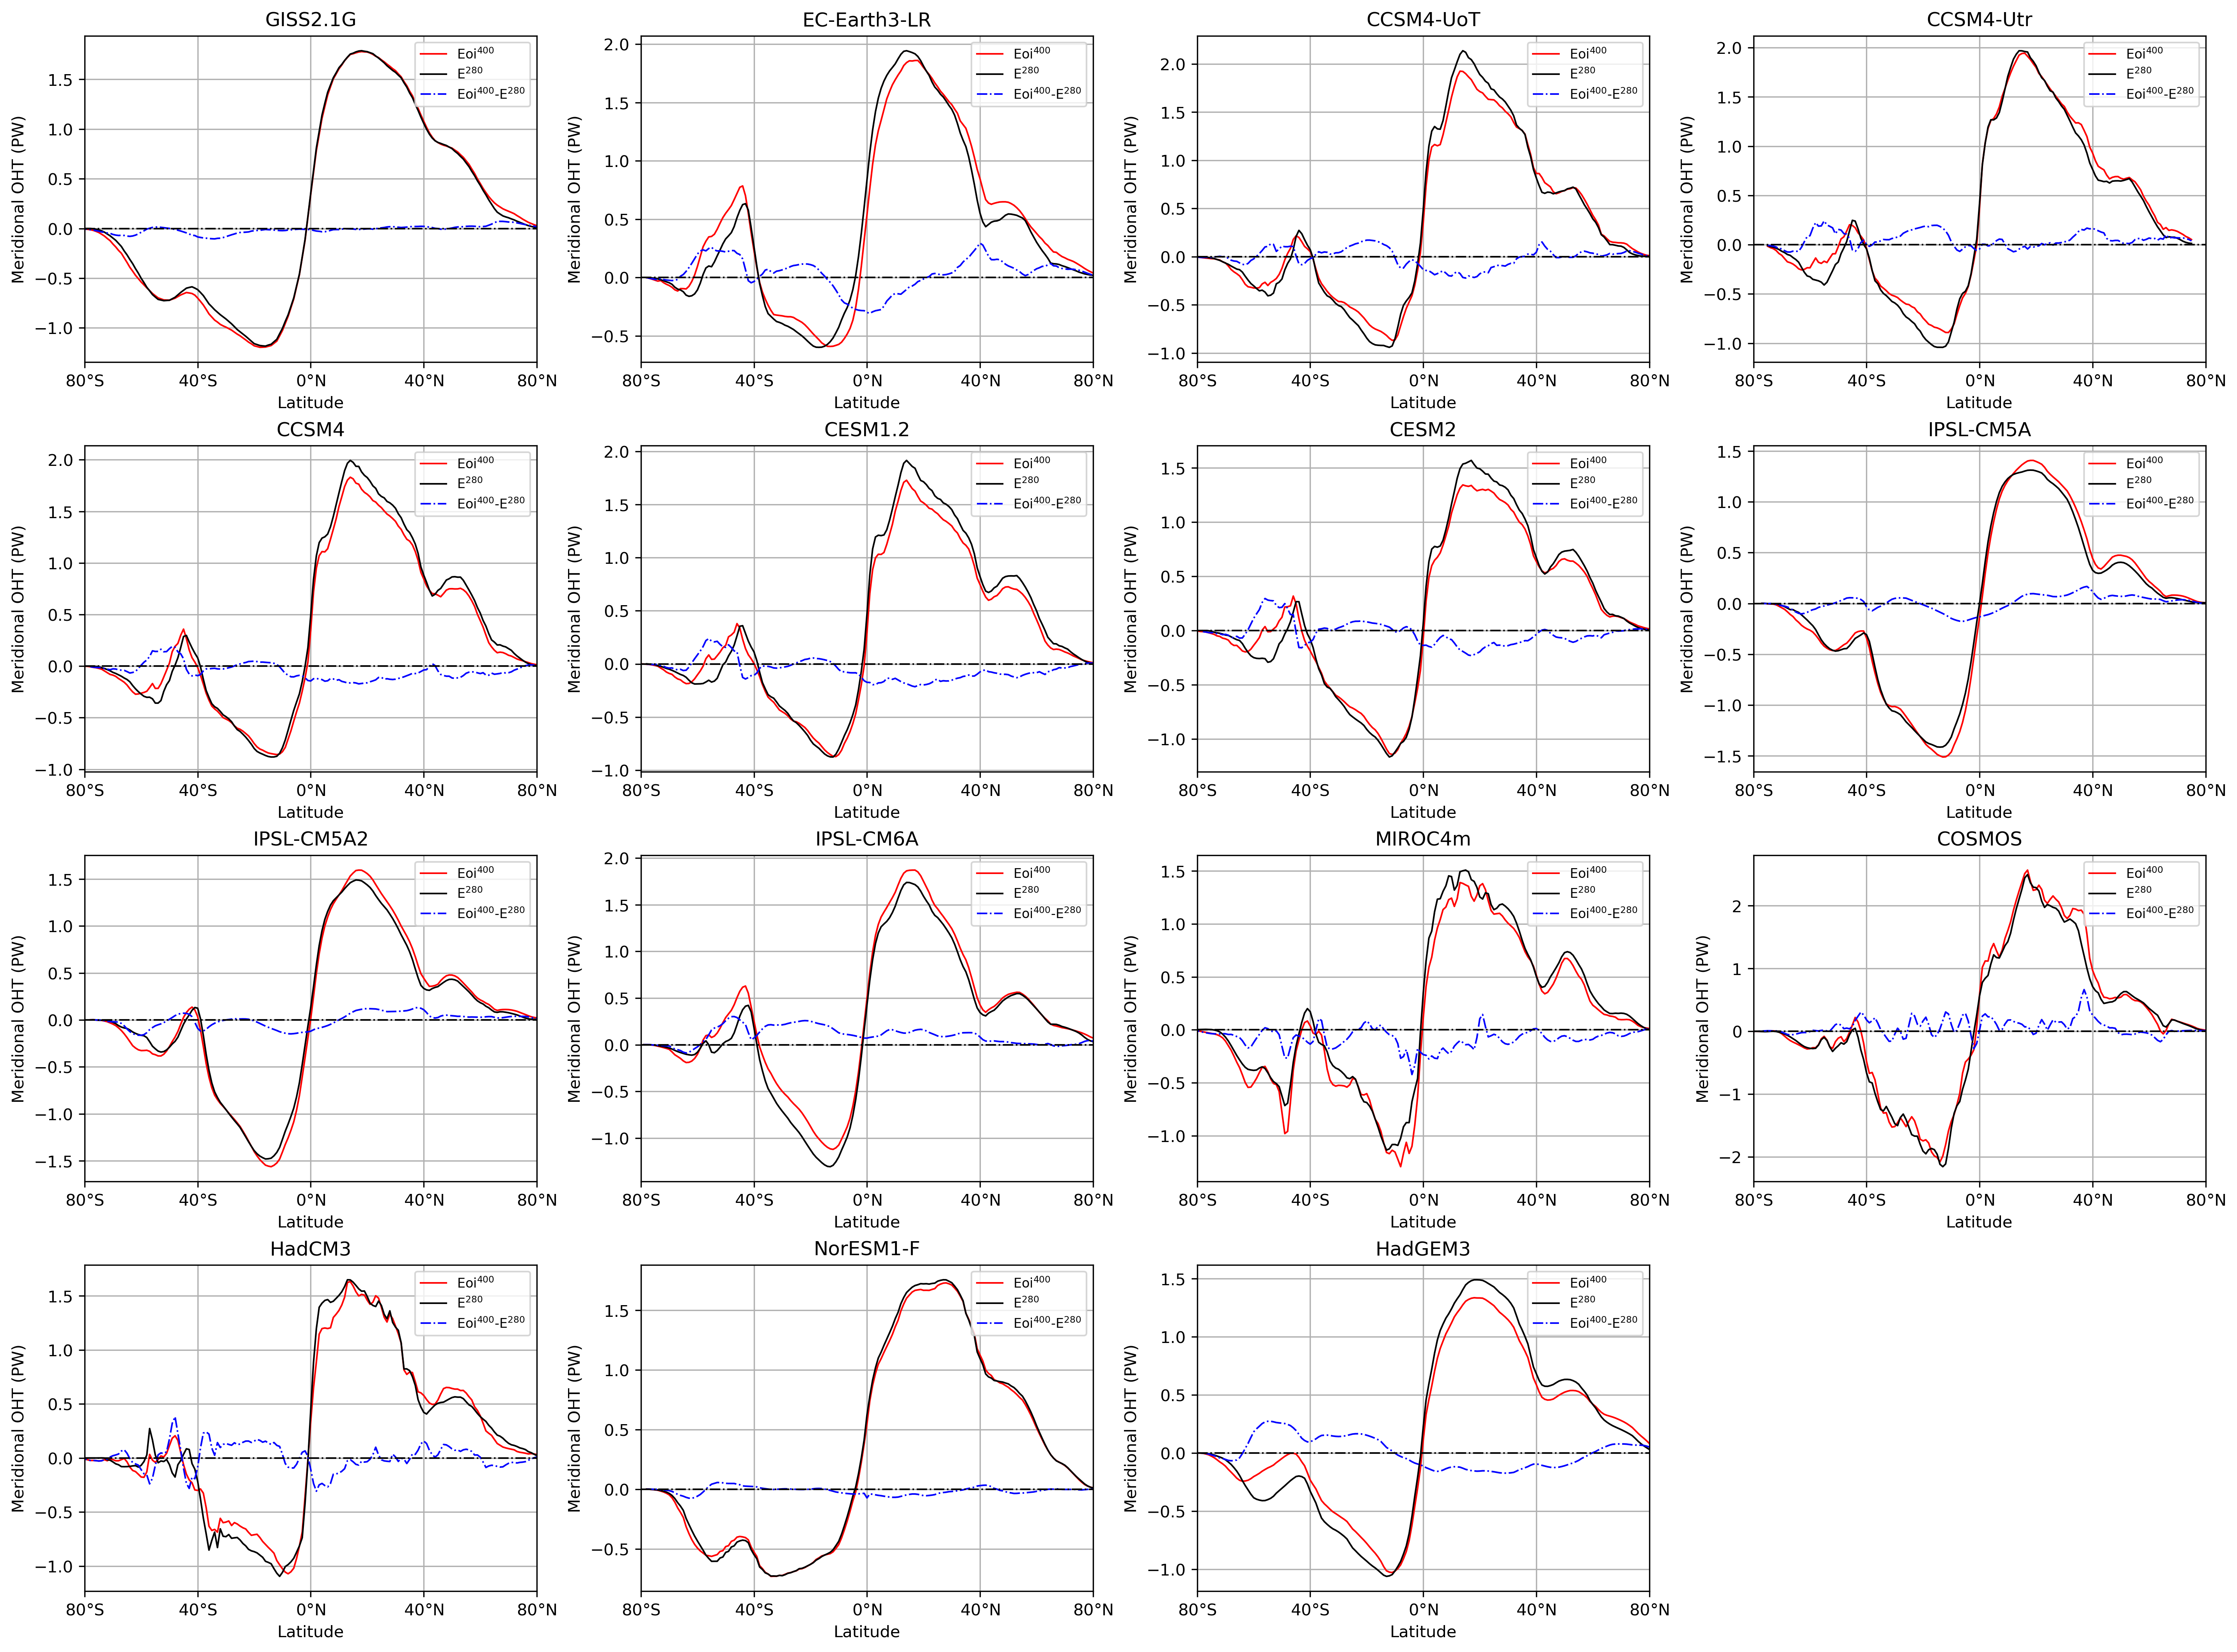

In [8]:
x_pos = np.array([-80,-40,0,40,80])
xtext = ('80$\degree$S', '40$\degree$S', '0$\degree$N', '40$\degree$N', '80$\degree$N')

fig1, axs = plt.subplots(nrows=4, ncols=4, figsize=(19, 14), constrained_layout=True, dpi=300)

axs = trim_axs(axs, len(modellist))

for ax, i in zip(axs, range(0,len(modellist))):
    model = modellist[i]
    (dsEoi400goht.OHT[i]).plot(ax = ax, color='red', linestyle = '-', linewidth = 1, label='Eoi$^{400}$')
    (dsE280goht.OHT[i]).plot(ax = ax, color='black', linestyle = '-', linewidth = 1, label='E$^{280}$')
    (dsEoi400goht.OHT[i]-dsE280goht.OHT[i]).plot(ax = ax, color='blue', linestyle = '-.', linewidth = 1, label='Eoi$^{400}$-E$^{280}$')
    ax.set_xlim([-80, 80])
    ax.set_title(model)
    ax.legend(loc='upper right', fontsize=8)
    ax.plot([-80,80],[0,0], color='black',linestyle='-.', linewidth = 1)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(xtext)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Meridional OHT (PW)')
    ax.grid(True)
    
#plt.savefig('SFig6.png', bbox_inches='tight')

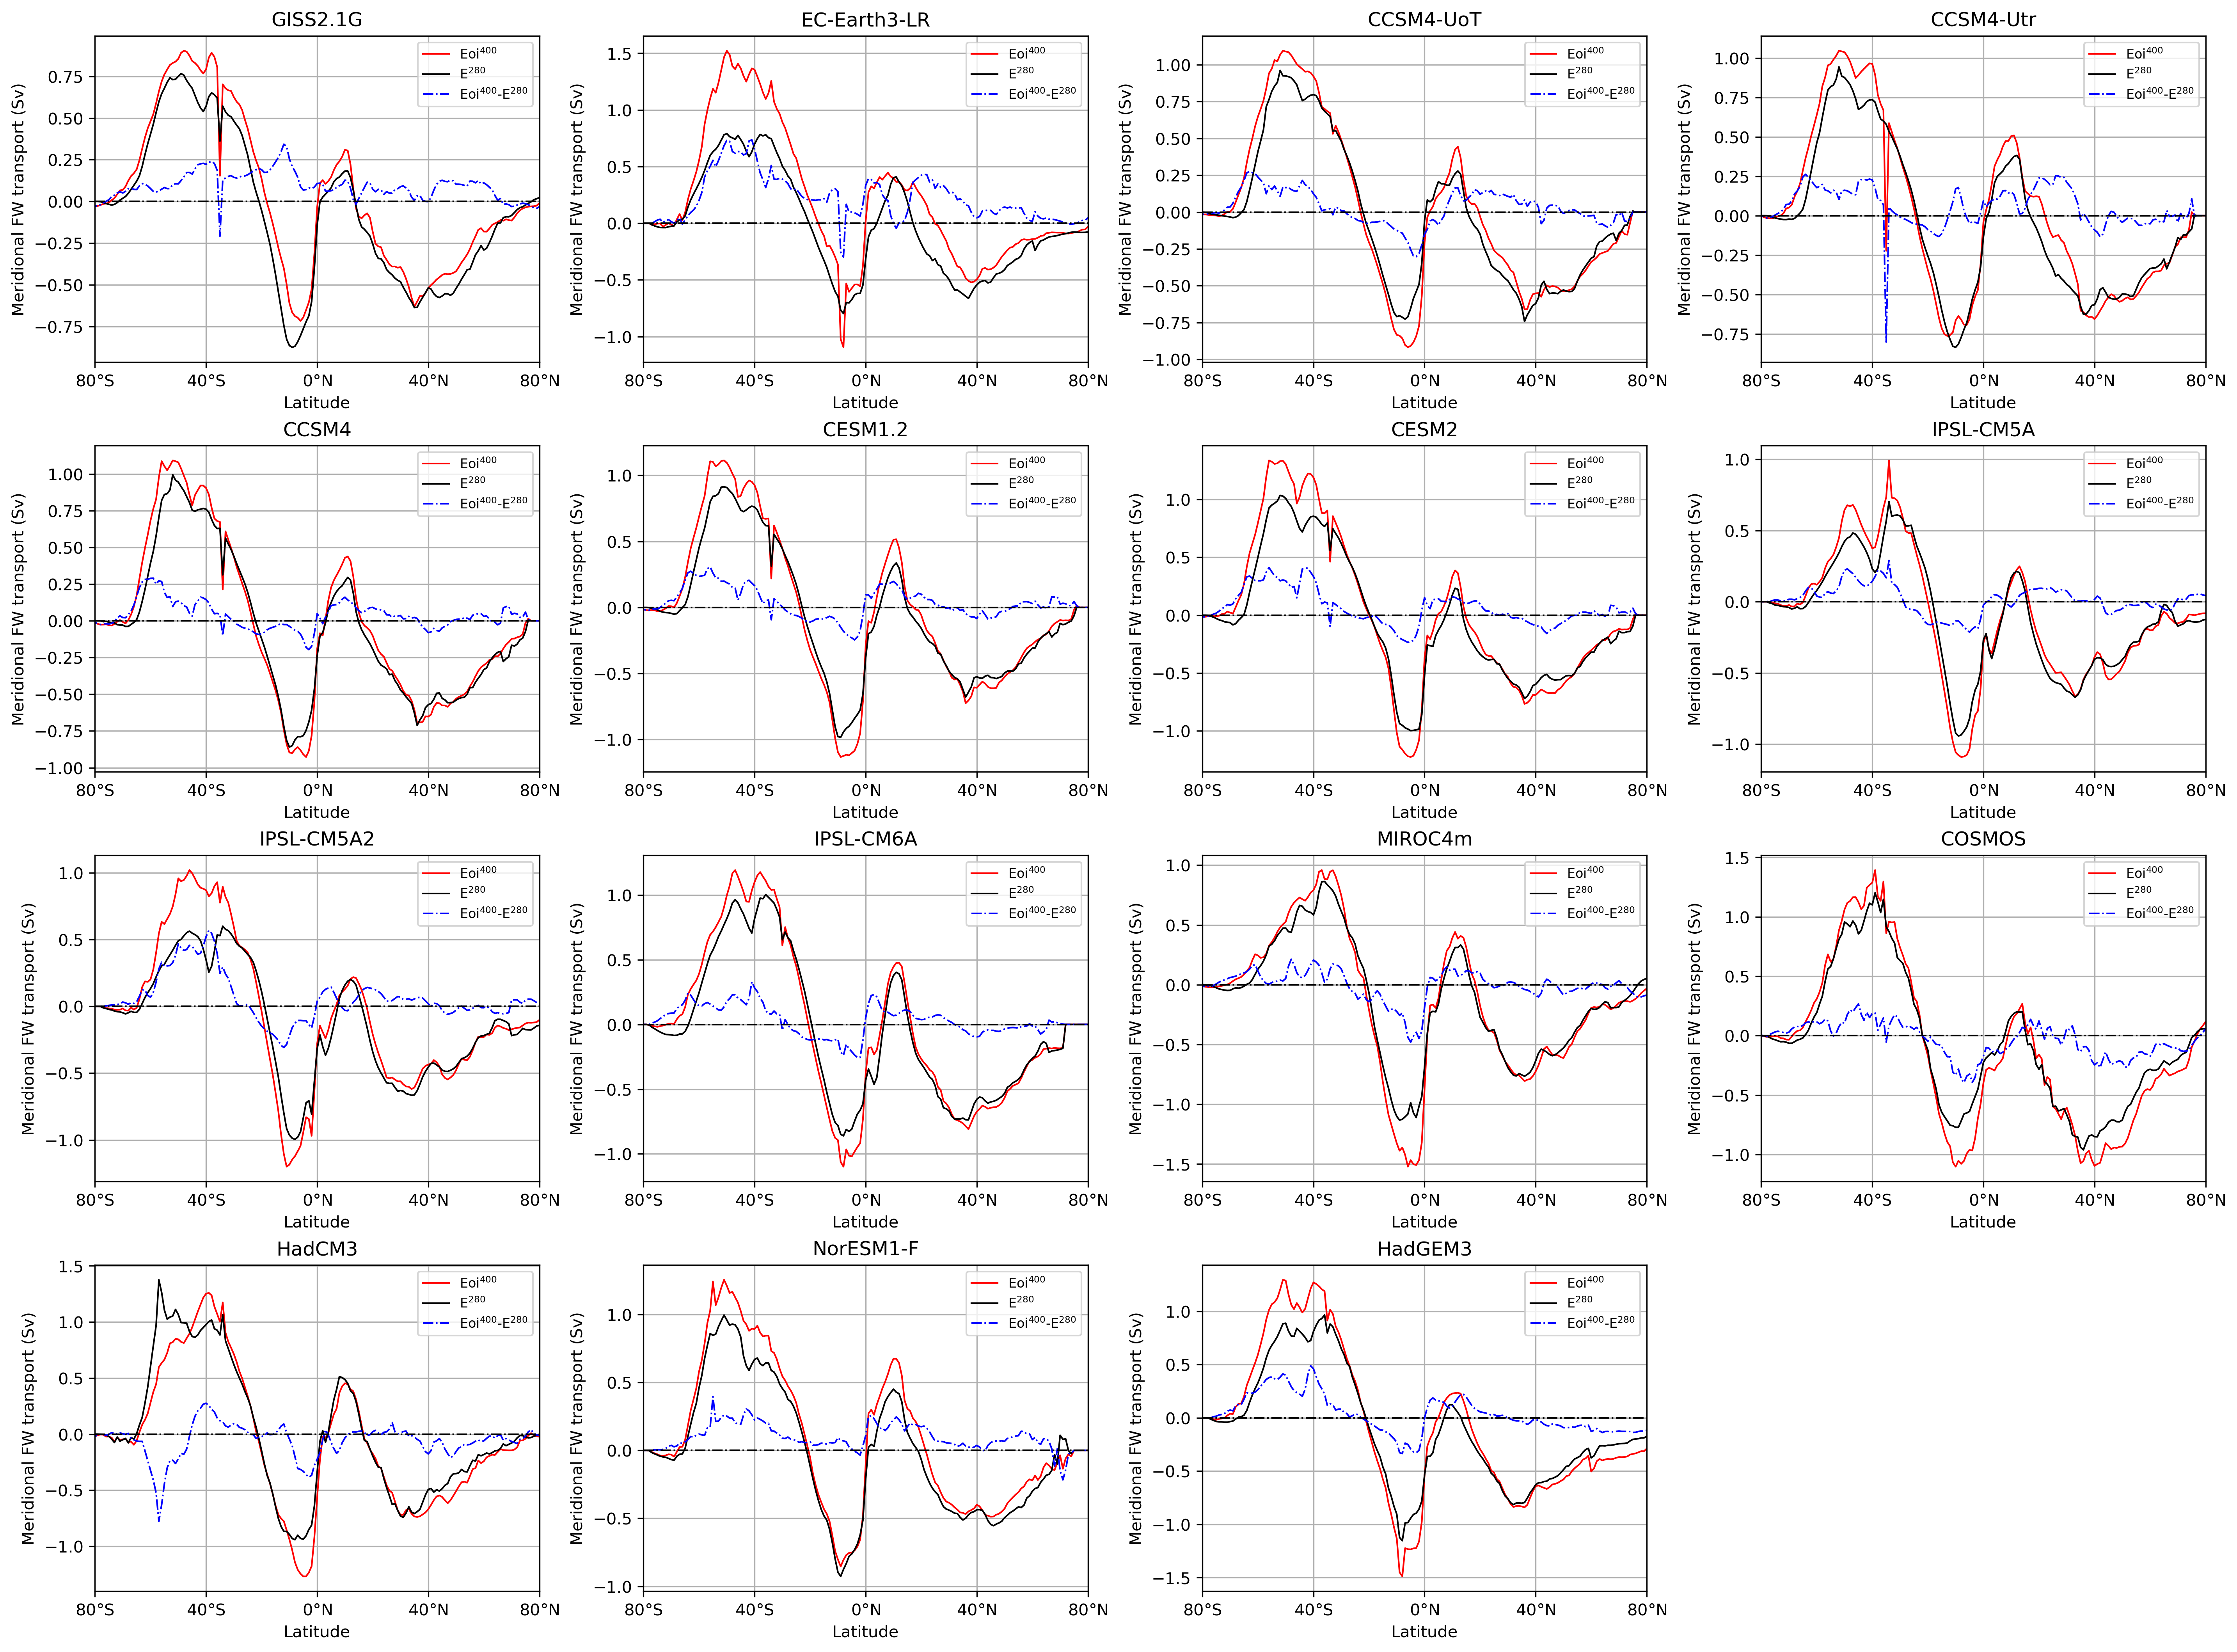

In [9]:
x_pos = np.array([-80,-40,0,40,80])
xtext = ('80$\degree$S', '40$\degree$S', '0$\degree$N', '40$\degree$N', '80$\degree$N')

fig1, axs = plt.subplots(nrows=4, ncols=4, figsize=(19, 14), constrained_layout=True, dpi=300)

axs = trim_axs(axs, len(modellist))

for ax, i in zip(axs, range(0,len(modellist))):
    model = modellist[i]
    (dsEoi400gfw.Ftot[i]).plot(ax = ax, color='red', linestyle = '-', linewidth = 1, label='Eoi$^{400}$')
    (dsE280gfw.Ftot[i]).plot(ax = ax, color='black', linestyle = '-', linewidth = 1, label='E$^{280}$')
    (dsEoi400gfw.Ftot[i]-dsE280gfw.Ftot[i]).plot(ax = ax, color='blue', linestyle = '-.', linewidth = 1, label='Eoi$^{400}$-E$^{280}$')
    ax.set_xlim([-80, 80])
    # if i == 11:
    #     ax.set_ylim([-2.3,2.7])
    # else:
    #     ax.set_ylim([-1.6, 2.2])
    ax.set_title(model)
    ax.legend(loc='upper right', fontsize=8)
    ax.plot([-80,80],[0,0], color='black',linestyle='-.', linewidth = 1)
    ax.set_xticks(x_pos)
    ax.set_xticklabels(xtext)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Meridional FW transport (Sv)')
    ax.grid(True)
    
#plt.savefig('SFig7.png', bbox_inches='tight')

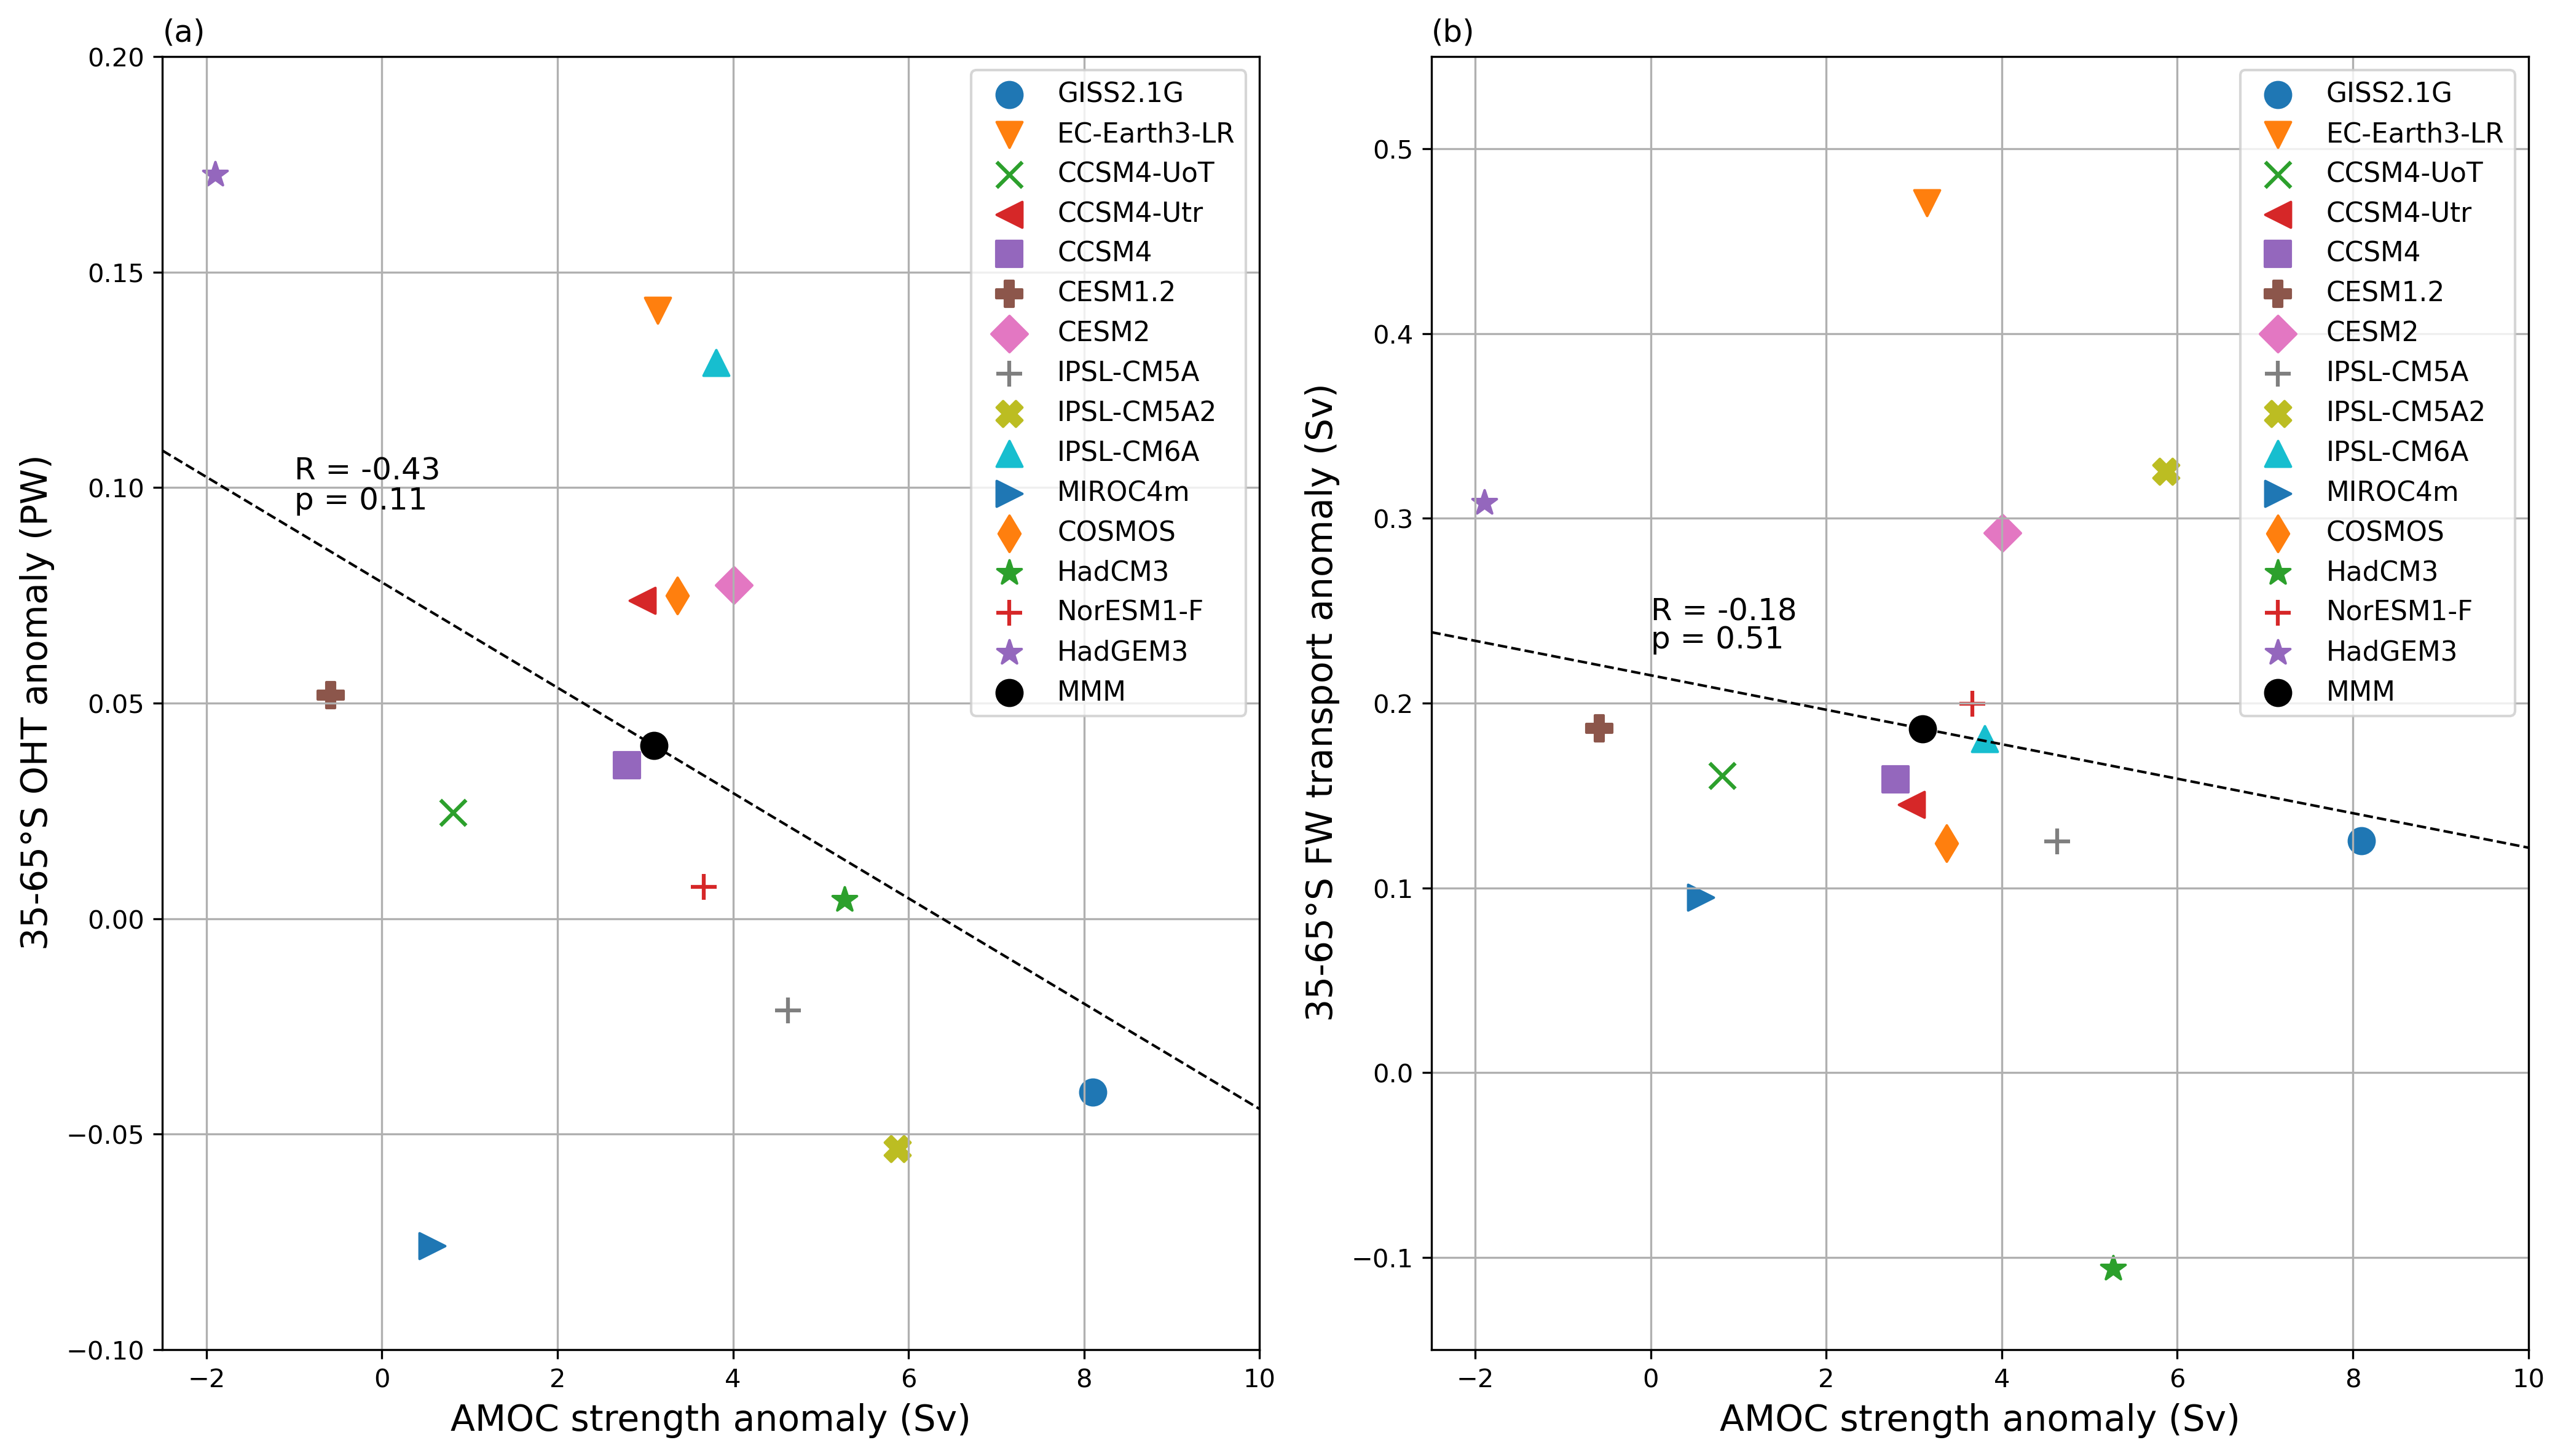

In [10]:
lats = np.arange(-89, 90)
fig = plt.figure(figsize=(14,8), dpi=300)

ax = fig.add_subplot(121)
x = np.arange(-200,100,0.1)

markers = ["o","v","x","<","s","P","D","+","X","^",">","d","*","+","*"]

fwchange = meanfw(dsEoi400gfw)-meanfw(dsE280gfw)
ohtchange = meanoht(dsEoi400goht)-meanoht(dsE280goht)
amoc = dsEoi400moc.amoc - dsE280moc.amoc

#Perform linear regression between AMOC anomaly and total/overturning OHT anomaly
p = scipy.stats.linregress(amoc, ohtchange)

for j in range(0,len(modellist)):
    scatter = ax.scatter(amoc[j], ohtchange[j], s=100, c = 'C'+str(j), label=modellist[j], marker=markers[j])
scatter = ax.scatter(np.mean(amoc), np.mean(ohtchange), s=100, c = 'k', label='MMM', marker='o')

ax.plot(x, x*p[0]+p[1], color='black',linewidth =1, linestyle ='--')    
ax.text(-1,0.102,'R = %.2f' %(p[2]), fontsize=12)
ax.text(-1,0.095, 'p = %.2f' %(p[3]), fontsize=12)

ax.set_ylim([-0.1, 0.2])
ax.set_xlabel('AMOC strength anomaly (Sv)', fontsize=14)
ax.set_xlim([-2.5, 10])
ax.set_title(r'(a)', loc='left')
ax.legend(loc='upper right', fontsize=10.5)
ax.grid()

ax.set_ylabel(r'35-65$\degree$S OHT anomaly (PW)', fontsize=14)

ax = fig.add_subplot(122)
x = np.arange(-200,100,0.1)

#Perform linear regression between AMOC anomaly and total/overturning OHT anomaly
p = scipy.stats.linregress(amoc, fwchange)

for j in range(0,len(modellist)):
    scatter = ax.scatter(amoc[j], fwchange[j], s=100, c = 'C'+str(j), label=modellist[j], marker=markers[j])
scatter = ax.scatter(np.mean(amoc), np.mean(fwchange), s=100, c = 'k', label='MMM', marker='o')

ax.plot(x, x*p[0]+p[1], color='black',linewidth =1, linestyle ='--')    
ax.text(0,0.245,'R = %.2f' %(p[2]), fontsize=12)
ax.text(0,0.23, 'p = %.2f' %(p[3]), fontsize=12)

ax.set_ylim([-0.15, 0.55])
ax.set_xlabel('AMOC strength anomaly (Sv)', fontsize=14)
ax.set_xlim([-2.5, 10])
ax.set_title(r'(b)', loc='left')
ax.legend(loc='upper right', fontsize=10.5)
ax.grid()

ax.set_ylabel(r'35-65$\degree$S FW transport anomaly (Sv)', fontsize=14)

fig.tight_layout()
#plt.savefig('SFig8.png', bbox_inches='tight')
